**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Exploración y Curación de Datos**

*Edición 2023*

----

# Trabajo práctico entregable - parte 1

En esta notebook, vamos a cargar el conjunto de datos de [la compentencia Kaggle](https://www.kaggle.com/dansbecker/melbourne-housing-snapshot) sobre estimación de precios de ventas de propiedades en Melbourne, Australia.

Utilizaremos el conjunto de datos reducido producido por [DanB](https://www.kaggle.com/dansbecker). Hemos subido una copia a un servidor de la Universidad Nacional de Córdoba para facilitar su acceso remoto.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn
seaborn.set_context('talk')

from sqlalchemy import create_engine, text

In [ ]:

import plotly
plotly.__version__


'5.13.1'

In [ ]:
melb_df = pd.read_csv(
    'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv')
melb_df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0


In [ ]:
columns = melb_df.columns
for col in columns:
  length= melb_df[col].nunique()
  print(col, length)
  if length < 10:
    print('col:', col)
    print (melb_df[col].value_counts())


Suburb 314
Address 13378
Rooms 9
col: Rooms
3     5881
2     3648
4     2688
1      681
5      596
6       67
7       10
8        8
10       1
Name: Rooms, dtype: int64
Type 3
col: Type
h    9449
u    3017
t    1114
Name: Type, dtype: int64
Price 2204
Method 5
col: Method
S     9022
SP    1703
PI    1564
VB    1199
SA      92
Name: Method, dtype: int64
SellerG 268
Date 58
Distance 202
Postcode 198
Bedroom2 12
Bathroom 9
col: Bathroom
1.0    7512
2.0    4974
3.0     917
4.0     106
0.0      34
5.0      28
6.0       5
7.0       2
8.0       2
Name: Bathroom, dtype: int64
Car 11
Landsize 1448
BuildingArea 602
YearBuilt 144
CouncilArea 33
Lattitude 6503
Longtitude 7063
Regionname 8
col: Regionname
Southern Metropolitan         4695
Northern Metropolitan         3890
Western Metropolitan          2948
Eastern Metropolitan          1471
South-Eastern Metropolitan     450
Eastern Victoria                53
Northern Victoria               41
Western Victoria                32
Name: Regionname, 

## Ejercicio 1 SQL:

1. Crear una base de datos en SQLite utilizando la libreria [SQLalchemy](https://stackoverflow.com/questions/2268050/execute-sql-from-file-in-sqlalchemy).
https://docs.sqlalchemy.org/en/14/core/engines.html#sqlite

2. Ingestar los datos provistos en 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv' en una tabla y el dataset generado en clase con datos de airbnb y sus precios por codigo postal en otra.

3. Implementar consultas en SQL que respondan con la siguiente información:

    - cantidad de registros totales por ciudad.
    - cantidad de registros totales por barrio y ciudad.

4. Combinar los datasets de ambas tablas ingestadas utilizando el comando JOIN de SQL  para obtener un resultado similar a lo realizado con Pandas en clase.  



## Ejercicio 2 - Pandas:

1. Seleccionar un subconjunto de columnas que les parezcan relevantes al problema de predicción del valor de la propiedad. Justificar las columnas seleccionadas y las que no lo fueron.
 - Eliminar los valores extremos que no sean relevantes para la predicción de valores de las propiedades.


2. Agregar información adicional respectiva al entorno de una propiedad a partir del [conjunto de datos de AirBnB](https://www.kaggle.com/tylerx/melbourne-airbnb-open-data?select=cleansed_listings_dec18.csv) utilizado en el práctico.
  1. Seleccionar qué variables agregar y qué combinaciones aplicar a cada una. Por ejemplo, pueden utilizar solo la columna `price`, o aplicar múltiples transformaciones como la mediana o el mínimo.
  1. Utilizar la variable zipcode para unir los conjuntos de datos. Sólo incluir los zipcodes que tengan una cantidad mínima de registros (a elección) como para que la información agregada sea relevante.
  2. Investigar al menos otras 2 variables que puedan servir para combinar los datos, y justificar si serían adecuadas o no. Pueden asumir que cuentan con la ayuda de anotadores expertos para encontrar equivalencias entre barrios o direcciones, o que cuentan con algoritmos para encontrar las n ubicaciones más cercanas a una propiedad a partir de sus coordenadas geográficas. **NO** es necesario que realicen la implementación.

Pueden leer otras columnas del conjunto de AirBnB además de las que están en `interesting_cols`, si les parecen relevantes.

## Ejercicio 3:

Crear y guardar un nuevo conjunto de datos con todas las transformaciones realizadas anteriormente.

## Ejercicios opcionales:

1. Armar un script en python (archivo .py) [ETL](https://towardsdatascience.com/what-to-log-from-python-etl-pipelines-9e0cfe29950e) que corra los pasos de extraccion, transformacion y carga, armando una funcion para cada etapa del proceso y luego un main que corra todos los pasos requeridos.

2. Armar un DAG en Apache Airflow que corra el ETL. (https://airflow.apache.org/docs/apache-airflow/stable/tutorial.html)

# Resolución ejercicios

## **Ejercicio 1.1**

In [ ]:
melb_df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [ ]:
#Creamos la base de datos
engine = create_engine('sqlite:///sysarmy.sqlite3', echo=True)

## **Ejercicio 1.2**

In [ ]:
#Insertamos la tabla 'Melb' con el conjunto de datos de la compentencia Kaggle sobre estimación de precios de ventas de propiedades en Melbourne, Australia
melb_df.to_sql('Melb', con=engine, if_exists="replace")

2023-06-09 01:47:26,188 INFO sqlalchemy.engine.Engine BEGIN (implicit)


INFO:sqlalchemy.engine.Engine:BEGIN (implicit)


2023-06-09 01:47:26,199 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("Melb")


INFO:sqlalchemy.engine.Engine:PRAGMA main.table_info("Melb")


2023-06-09 01:47:26,207 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


2023-06-09 01:47:26,216 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("Melb")


INFO:sqlalchemy.engine.Engine:PRAGMA temp.table_info("Melb")


2023-06-09 01:47:26,221 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


2023-06-09 01:47:26,228 INFO sqlalchemy.engine.Engine ROLLBACK


INFO:sqlalchemy.engine.Engine:ROLLBACK


2023-06-09 01:47:26,237 INFO sqlalchemy.engine.Engine BEGIN (implicit)


INFO:sqlalchemy.engine.Engine:BEGIN (implicit)


2023-06-09 01:47:26,244 INFO sqlalchemy.engine.Engine 
CREATE TABLE "Melb" (
	"index" BIGINT, 
	"Suburb" TEXT, 
	"Address" TEXT, 
	"Rooms" BIGINT, 
	"Type" TEXT, 
	"Price" FLOAT, 
	"Method" TEXT, 
	"SellerG" TEXT, 
	"Date" TEXT, 
	"Distance" FLOAT, 
	"Postcode" FLOAT, 
	"Bedroom2" FLOAT, 
	"Bathroom" FLOAT, 
	"Car" FLOAT, 
	"Landsize" FLOAT, 
	"BuildingArea" FLOAT, 
	"YearBuilt" FLOAT, 
	"CouncilArea" TEXT, 
	"Lattitude" FLOAT, 
	"Longtitude" FLOAT, 
	"Regionname" TEXT, 
	"Propertycount" FLOAT
)




INFO:sqlalchemy.engine.Engine:
CREATE TABLE "Melb" (
	"index" BIGINT, 
	"Suburb" TEXT, 
	"Address" TEXT, 
	"Rooms" BIGINT, 
	"Type" TEXT, 
	"Price" FLOAT, 
	"Method" TEXT, 
	"SellerG" TEXT, 
	"Date" TEXT, 
	"Distance" FLOAT, 
	"Postcode" FLOAT, 
	"Bedroom2" FLOAT, 
	"Bathroom" FLOAT, 
	"Car" FLOAT, 
	"Landsize" FLOAT, 
	"BuildingArea" FLOAT, 
	"YearBuilt" FLOAT, 
	"CouncilArea" TEXT, 
	"Lattitude" FLOAT, 
	"Longtitude" FLOAT, 
	"Regionname" TEXT, 
	"Propertycount" FLOAT
)




2023-06-09 01:47:26,250 INFO sqlalchemy.engine.Engine [no key 0.00643s] ()


INFO:sqlalchemy.engine.Engine:[no key 0.00643s] ()


2023-06-09 01:47:26,269 INFO sqlalchemy.engine.Engine CREATE INDEX "ix_Melb_index" ON "Melb" ("index")


INFO:sqlalchemy.engine.Engine:CREATE INDEX "ix_Melb_index" ON "Melb" ("index")


2023-06-09 01:47:26,273 INFO sqlalchemy.engine.Engine [no key 0.00439s] ()


INFO:sqlalchemy.engine.Engine:[no key 0.00439s] ()


2023-06-09 01:47:26,288 INFO sqlalchemy.engine.Engine COMMIT


INFO:sqlalchemy.engine.Engine:COMMIT


2023-06-09 01:47:26,340 INFO sqlalchemy.engine.Engine BEGIN (implicit)


INFO:sqlalchemy.engine.Engine:BEGIN (implicit)


2023-06-09 01:47:26,836 INFO sqlalchemy.engine.Engine INSERT INTO "Melb" ("index", "Suburb", "Address", "Rooms", "Type", "Price", "Method", "SellerG", "Date", "Distance", "Postcode", "Bedroom2", "Bathroom", "Car", "Landsize", "BuildingArea", "YearBuilt", "CouncilArea", "Lattitude", "Longtitude", "Regionname", "Propertycount") VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)


INFO:sqlalchemy.engine.Engine:INSERT INTO "Melb" ("index", "Suburb", "Address", "Rooms", "Type", "Price", "Method", "SellerG", "Date", "Distance", "Postcode", "Bedroom2", "Bathroom", "Car", "Landsize", "BuildingArea", "YearBuilt", "CouncilArea", "Lattitude", "Longtitude", "Regionname", "Propertycount") VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)


2023-06-09 01:47:26,849 INFO sqlalchemy.engine.Engine [generated in 0.40143s] [(0, 'Abbotsford', '85 Turner St', 2, 'h', 1480000.0, 'S', 'Biggin', '3/12/2016', 2.5, 3067.0, 2.0, 1.0, 1.0, 202.0, None, None, 'Yarra', -37.7996, 144.9984, 'Northern Metropolitan', 4019.0), (1, 'Abbotsford', '25 Bloomburg St', 2, 'h', 1035000.0, 'S', 'Biggin', '4/02/2016', 2.5, 3067.0, 2.0, 1.0, 0.0, 156.0, 79.0, 1900.0, 'Yarra', -37.8079, 144.9934, 'Northern Metropolitan', 4019.0), (2, 'Abbotsford', '5 Charles St', 3, 'h', 1465000.0, 'SP', 'Biggin', '4/03/2017', 2.5, 3067.0, 3.0, 2.0, 0.0, 134.0, 150.0, 1900.0, 'Yarra', -37.8093, 144.9944, 'Northern Metropolitan', 4019.0), (3, 'Abbotsford', '40 Federation La', 3, 'h', 850000.0, 'PI', 'Biggin', '4/03/2017', 2.5, 3067.0, 3.0, 2.0, 1.0, 94.0, None, None, 'Yarra', -37.7969, 144.9969, 'Northern Metropolitan', 4019.0), (4, 'Abbotsford', '55a Park St', 4, 'h', 1600000.0, 'VB', 'Nelson', '4/06/2016', 2.5, 3067.0, 3.0, 1.0, 2.0, 120.0, 142.0, 2014.0, 'Yarra', -37.8

INFO:sqlalchemy.engine.Engine:[generated in 0.40143s] [(0, 'Abbotsford', '85 Turner St', 2, 'h', 1480000.0, 'S', 'Biggin', '3/12/2016', 2.5, 3067.0, 2.0, 1.0, 1.0, 202.0, None, None, 'Yarra', -37.7996, 144.9984, 'Northern Metropolitan', 4019.0), (1, 'Abbotsford', '25 Bloomburg St', 2, 'h', 1035000.0, 'S', 'Biggin', '4/02/2016', 2.5, 3067.0, 2.0, 1.0, 0.0, 156.0, 79.0, 1900.0, 'Yarra', -37.8079, 144.9934, 'Northern Metropolitan', 4019.0), (2, 'Abbotsford', '5 Charles St', 3, 'h', 1465000.0, 'SP', 'Biggin', '4/03/2017', 2.5, 3067.0, 3.0, 2.0, 0.0, 134.0, 150.0, 1900.0, 'Yarra', -37.8093, 144.9944, 'Northern Metropolitan', 4019.0), (3, 'Abbotsford', '40 Federation La', 3, 'h', 850000.0, 'PI', 'Biggin', '4/03/2017', 2.5, 3067.0, 3.0, 2.0, 1.0, 94.0, None, None, 'Yarra', -37.7969, 144.9969, 'Northern Metropolitan', 4019.0), (4, 'Abbotsford', '55a Park St', 4, 'h', 1600000.0, 'VB', 'Nelson', '4/06/2016', 2.5, 3067.0, 3.0, 1.0, 2.0, 120.0, 142.0, 2014.0, 'Yarra', -37.8072, 144.9941, 'Northern

2023-06-09 01:47:27,010 INFO sqlalchemy.engine.Engine COMMIT


INFO:sqlalchemy.engine.Engine:COMMIT


2023-06-09 01:47:27,045 INFO sqlalchemy.engine.Engine BEGIN (implicit)


INFO:sqlalchemy.engine.Engine:BEGIN (implicit)


2023-06-09 01:47:27,055 INFO sqlalchemy.engine.Engine SELECT name FROM sqlite_master WHERE type='table' AND name NOT LIKE 'sqlite~_%' ESCAPE '~' ORDER BY name


INFO:sqlalchemy.engine.Engine:SELECT name FROM sqlite_master WHERE type='table' AND name NOT LIKE 'sqlite~_%' ESCAPE '~' ORDER BY name


2023-06-09 01:47:27,068 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


2023-06-09 01:47:27,077 INFO sqlalchemy.engine.Engine ROLLBACK


INFO:sqlalchemy.engine.Engine:ROLLBACK


13580

In [ ]:
#Creamos el DataFrame con los datos de Airbnb para insertarlos posteriormente en otra tabla de la Base de datos
airbnbCLases_df = pd.read_csv('https://raw.githubusercontent.com/Freinoso95/Diplo2023/main/airbnb_price_by_zipcode%20(2).csv')

In [ ]:
airbnbCLases_df

,zipcode,airbnb_price_mean,airbnb_record_count,airbnb_weekly_price_mean,airbnb_monthly_price_mean
0,2010.0,40.000000,1,NaN,NaN
1,2134.0,50.000000,1,NaN,NaN
2,2582.0,104.000000,1,NaN,NaN
3,3000.0,150.504307,3367,918.738956,3407.204651
4,3001.0,132.500000,2,NaN,NaN
...,...,...,...,...,...
242,7367.0,230.000000,1,NaN,NaN
243,8938.0,296.000000,1,NaN,NaN
244,9004.0,226.000000,1,NaN,NaN
245,9540.0,245.000000,1,NaN,NaN


In [ ]:
#Insertamos el DataFrame de Airbnb en otra tabla del SQL
airbnbCLases_df.to_sql('AirbnbClases', con=engine, if_exists="replace")

2023-06-09 01:47:27,607 INFO sqlalchemy.engine.Engine BEGIN (implicit)


INFO:sqlalchemy.engine.Engine:BEGIN (implicit)


2023-06-09 01:47:27,616 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("AirbnbClases")


INFO:sqlalchemy.engine.Engine:PRAGMA main.table_info("AirbnbClases")


2023-06-09 01:47:27,629 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


2023-06-09 01:47:27,647 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("AirbnbClases")


INFO:sqlalchemy.engine.Engine:PRAGMA temp.table_info("AirbnbClases")


2023-06-09 01:47:27,659 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


2023-06-09 01:47:27,672 INFO sqlalchemy.engine.Engine ROLLBACK


INFO:sqlalchemy.engine.Engine:ROLLBACK


2023-06-09 01:47:27,680 INFO sqlalchemy.engine.Engine BEGIN (implicit)


INFO:sqlalchemy.engine.Engine:BEGIN (implicit)


2023-06-09 01:47:27,691 INFO sqlalchemy.engine.Engine 
CREATE TABLE "AirbnbClases" (
	"index" BIGINT, 
	zipcode FLOAT, 
	airbnb_price_mean FLOAT, 
	airbnb_record_count BIGINT, 
	airbnb_weekly_price_mean FLOAT, 
	airbnb_monthly_price_mean FLOAT
)




INFO:sqlalchemy.engine.Engine:
CREATE TABLE "AirbnbClases" (
	"index" BIGINT, 
	zipcode FLOAT, 
	airbnb_price_mean FLOAT, 
	airbnb_record_count BIGINT, 
	airbnb_weekly_price_mean FLOAT, 
	airbnb_monthly_price_mean FLOAT
)




2023-06-09 01:47:27,694 INFO sqlalchemy.engine.Engine [no key 0.00231s] ()


INFO:sqlalchemy.engine.Engine:[no key 0.00231s] ()


2023-06-09 01:47:27,708 INFO sqlalchemy.engine.Engine CREATE INDEX "ix_AirbnbClases_index" ON "AirbnbClases" ("index")


INFO:sqlalchemy.engine.Engine:CREATE INDEX "ix_AirbnbClases_index" ON "AirbnbClases" ("index")


2023-06-09 01:47:27,719 INFO sqlalchemy.engine.Engine [no key 0.01118s] ()


INFO:sqlalchemy.engine.Engine:[no key 0.01118s] ()


2023-06-09 01:47:27,737 INFO sqlalchemy.engine.Engine COMMIT


INFO:sqlalchemy.engine.Engine:COMMIT


2023-06-09 01:47:27,742 INFO sqlalchemy.engine.Engine BEGIN (implicit)


INFO:sqlalchemy.engine.Engine:BEGIN (implicit)


2023-06-09 01:47:27,750 INFO sqlalchemy.engine.Engine INSERT INTO "AirbnbClases" ("index", zipcode, airbnb_price_mean, airbnb_record_count, airbnb_weekly_price_mean, airbnb_monthly_price_mean) VALUES (?, ?, ?, ?, ?, ?)


INFO:sqlalchemy.engine.Engine:INSERT INTO "AirbnbClases" ("index", zipcode, airbnb_price_mean, airbnb_record_count, airbnb_weekly_price_mean, airbnb_monthly_price_mean) VALUES (?, ?, ?, ?, ?, ?)


2023-06-09 01:47:27,759 INFO sqlalchemy.engine.Engine [generated in 0.01043s] [(0, 2010.0, 40.0, 1, None, None), (1, 2134.0, 50.0, 1, None, None), (2, 2582.0, 104.0, 1, None, None), (3, 3000.0, 150.5043065043065, 3367, 918.7389558232932, 3407.204651162791), (4, 3001.0, 132.5, 2, None, None), (5, 3002.0, 200.9796954314721, 197, 956.3793103448276, 3712.714285714286), (6, 3003.0, 130.20599250936328, 267, 760.2, 2629.5), (7, 3004.0, 158.271978021978, 728, 1061.1714285714286, 3759.925925925926)  ... displaying 10 of 247 total bound parameter sets ...  (245, 9540.0, 245.0, 1, None, None), (246, 30122.0, 75.0, 1, 525.0, 2281.0)]


INFO:sqlalchemy.engine.Engine:[generated in 0.01043s] [(0, 2010.0, 40.0, 1, None, None), (1, 2134.0, 50.0, 1, None, None), (2, 2582.0, 104.0, 1, None, None), (3, 3000.0, 150.5043065043065, 3367, 918.7389558232932, 3407.204651162791), (4, 3001.0, 132.5, 2, None, None), (5, 3002.0, 200.9796954314721, 197, 956.3793103448276, 3712.714285714286), (6, 3003.0, 130.20599250936328, 267, 760.2, 2629.5), (7, 3004.0, 158.271978021978, 728, 1061.1714285714286, 3759.925925925926)  ... displaying 10 of 247 total bound parameter sets ...  (245, 9540.0, 245.0, 1, None, None), (246, 30122.0, 75.0, 1, 525.0, 2281.0)]


2023-06-09 01:47:27,782 INFO sqlalchemy.engine.Engine COMMIT


INFO:sqlalchemy.engine.Engine:COMMIT


2023-06-09 01:47:27,798 INFO sqlalchemy.engine.Engine BEGIN (implicit)


INFO:sqlalchemy.engine.Engine:BEGIN (implicit)


2023-06-09 01:47:27,800 INFO sqlalchemy.engine.Engine SELECT name FROM sqlite_master WHERE type='table' AND name NOT LIKE 'sqlite~_%' ESCAPE '~' ORDER BY name


INFO:sqlalchemy.engine.Engine:SELECT name FROM sqlite_master WHERE type='table' AND name NOT LIKE 'sqlite~_%' ESCAPE '~' ORDER BY name


2023-06-09 01:47:27,806 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


2023-06-09 01:47:27,809 INFO sqlalchemy.engine.Engine ROLLBACK


INFO:sqlalchemy.engine.Engine:ROLLBACK


247

In [ ]:
#Leemos el csv de Airbnb completo y lo agregamos en otra tabla de la base de datos
interesting_cols = [
  'description', 'neighborhood_overview',
  'street', 'neighborhood', 'city', 'suburb', 'state', 'zipcode',
  'price', 'weekly_price', 'monthly_price',
  'latitude', 'longitude',
]

airbnb_df = pd.read_csv(
    'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/cleansed_listings_dec18.csv',
    usecols=interesting_cols)

<ipython-input-11-17a8e46e56a3>:9: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  airbnb_df = pd.read_csv(


In [ ]:
airbnb_df

,description,neighborhood_overview,street,neighborhood,city,suburb,state,zipcode,latitude,longitude,price,weekly_price,monthly_price
0,"House: Clean, New, Modern, Quite, Safe. 10Km f...",Very safe! Family oriented. Older age group.,"Bulleen, VIC, Australia",Balwyn North,Manningham,Bulleen,VIC,3105,-37.772684,145.092133,60,NaN,NaN
1,A large air conditioned room with queen spring...,This hip area is a crossroads between two grea...,"Brunswick East, VIC, Australia",Brunswick,Moreland,Brunswick East,VIC,3057,-37.766505,144.980736,35,200.0,803.0
2,RIGHT IN THE HEART OF ST KILDA! It doesn't get...,A stay at our apartment means you can enjoy so...,"St Kilda, VIC, Australia",St Kilda,Port Phillip,St Kilda,VIC,3182,-37.859755,144.977369,159,1253.0,4452.0
3,"Comfortable, relaxed house, a home away from ...","This is a great neighbourhood – it is quiet, y...","Thornbury, VIC, Australia",Thornbury,Darebin,Thornbury,VIC,3071,-37.758971,144.989228,50,250.0,920.0
4,We offer comfortable accommodation in Inner Me...,NaN,"St Kilda East, VIC, Australia",St Kilda East,Port Phillip,St Kilda East,VIC,3183,-37.864530,144.992238,69,400.0,1900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22890,"near city, near tram station",NaN,"Carlton, VIC, Australia",Carlton,Melbourne,Carlton,VIC,3053.0,-37.802415,144.962967,55,NaN,NaN
22891,"Close to: Melton Rail, Coles, Coffee Lounge an...",NaN,"Melton South, VIC, Australia",NaN,Melton,Melton South,VIC,3338.0,-37.705095,144.574474,129,NaN,NaN
22892,"Hi, 我是一名中国留学生. 由于暑假原因决定出租我的房间. 我会留下我所使用的物品给我的租...",NaN,"Glen Waverley, VIC, Australia",NaN,Monash,Glen Waverley,VIC,3150.0,-37.875252,145.162757,53,NaN,NaN
22893,Immaculately presented and carefully maintaine...,A plethora of Melbourne highlights are just a ...,"Southbank, VIC, Australia",Southbank,Melbourne,Southbank,VIC,3006.0,-37.827795,144.954987,130,NaN,NaN


In [ ]:
#Insertamos el DataFrame de Airbnb completo en otra tabla del SQL
airbnb_df.to_sql('AirbnbCompleto', con=engine, if_exists="replace")

2023-06-09 01:47:40,995 INFO sqlalchemy.engine.Engine BEGIN (implicit)


INFO:sqlalchemy.engine.Engine:BEGIN (implicit)


2023-06-09 01:47:41,005 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("AirbnbCompleto")


INFO:sqlalchemy.engine.Engine:PRAGMA main.table_info("AirbnbCompleto")


2023-06-09 01:47:41,012 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


2023-06-09 01:47:41,015 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("AirbnbCompleto")


INFO:sqlalchemy.engine.Engine:PRAGMA temp.table_info("AirbnbCompleto")


2023-06-09 01:47:41,019 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


2023-06-09 01:47:41,025 INFO sqlalchemy.engine.Engine ROLLBACK


INFO:sqlalchemy.engine.Engine:ROLLBACK


2023-06-09 01:47:41,032 INFO sqlalchemy.engine.Engine BEGIN (implicit)


INFO:sqlalchemy.engine.Engine:BEGIN (implicit)


2023-06-09 01:47:41,038 INFO sqlalchemy.engine.Engine 
CREATE TABLE "AirbnbCompleto" (
	"index" BIGINT, 
	description TEXT, 
	neighborhood_overview TEXT, 
	street TEXT, 
	neighborhood TEXT, 
	city TEXT, 
	suburb TEXT, 
	state TEXT, 
	zipcode TEXT, 
	latitude FLOAT, 
	longitude FLOAT, 
	price BIGINT, 
	weekly_price FLOAT, 
	monthly_price FLOAT
)




INFO:sqlalchemy.engine.Engine:
CREATE TABLE "AirbnbCompleto" (
	"index" BIGINT, 
	description TEXT, 
	neighborhood_overview TEXT, 
	street TEXT, 
	neighborhood TEXT, 
	city TEXT, 
	suburb TEXT, 
	state TEXT, 
	zipcode TEXT, 
	latitude FLOAT, 
	longitude FLOAT, 
	price BIGINT, 
	weekly_price FLOAT, 
	monthly_price FLOAT
)




2023-06-09 01:47:41,042 INFO sqlalchemy.engine.Engine [no key 0.00421s] ()


INFO:sqlalchemy.engine.Engine:[no key 0.00421s] ()


2023-06-09 01:47:41,062 INFO sqlalchemy.engine.Engine CREATE INDEX "ix_AirbnbCompleto_index" ON "AirbnbCompleto" ("index")


INFO:sqlalchemy.engine.Engine:CREATE INDEX "ix_AirbnbCompleto_index" ON "AirbnbCompleto" ("index")


2023-06-09 01:47:41,065 INFO sqlalchemy.engine.Engine [no key 0.00283s] ()


INFO:sqlalchemy.engine.Engine:[no key 0.00283s] ()


2023-06-09 01:47:41,089 INFO sqlalchemy.engine.Engine COMMIT


INFO:sqlalchemy.engine.Engine:COMMIT


2023-06-09 01:47:41,156 INFO sqlalchemy.engine.Engine BEGIN (implicit)


INFO:sqlalchemy.engine.Engine:BEGIN (implicit)


2023-06-09 01:47:41,718 INFO sqlalchemy.engine.Engine INSERT INTO "AirbnbCompleto" ("index", description, neighborhood_overview, street, neighborhood, city, suburb, state, zipcode, latitude, longitude, price, weekly_price, monthly_price) VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)


INFO:sqlalchemy.engine.Engine:INSERT INTO "AirbnbCompleto" ("index", description, neighborhood_overview, street, neighborhood, city, suburb, state, zipcode, latitude, longitude, price, weekly_price, monthly_price) VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)


2023-06-09 01:47:41,722 INFO sqlalchemy.engine.Engine [generated in 0.44237s] [(0, 'House: Clean, New, Modern, Quite, Safe. 10Km from the City. Golf course, Tennis courts, bus stop & shops walking distance!! Rooms: Contains one queen ... (702 characters truncated) ... pproximately what your daily in and out hours might look like.  Note: There is a 5 year old fun loving dog who lives with us and is part of our famil', 'Very safe! Family oriented. Older age group.', 'Bulleen, VIC, Australia', 'Balwyn North', 'Manningham', 'Bulleen', 'VIC', '3105', -37.77268393, 145.0921328, 60, None, None), (1, "A large air conditioned room with queen spring mattress bed in a vintage apartment. Located right outside is a tram to the city just 19 minutes away. ... (702 characters truncated) ... ou east to Bundoora and west to Pacoevale. The Lygon Street tram line that goes past Melbourne University is 10 minutes walk west and Sydney Road and", "This hip area is a crossroads between two great cultural stri

INFO:sqlalchemy.engine.Engine:[generated in 0.44237s] [(0, 'House: Clean, New, Modern, Quite, Safe. 10Km from the City. Golf course, Tennis courts, bus stop & shops walking distance!! Rooms: Contains one queen ... (702 characters truncated) ... pproximately what your daily in and out hours might look like.  Note: There is a 5 year old fun loving dog who lives with us and is part of our famil', 'Very safe! Family oriented. Older age group.', 'Bulleen, VIC, Australia', 'Balwyn North', 'Manningham', 'Bulleen', 'VIC', '3105', -37.77268393, 145.0921328, 60, None, None), (1, "A large air conditioned room with queen spring mattress bed in a vintage apartment. Located right outside is a tram to the city just 19 minutes away. ... (702 characters truncated) ... ou east to Bundoora and west to Pacoevale. The Lygon Street tram line that goes past Melbourne University is 10 minutes walk west and Sydney Road and", "This hip area is a crossroads between two great cultural strips of inner Northern Mel

2023-06-09 01:47:41,934 INFO sqlalchemy.engine.Engine COMMIT


INFO:sqlalchemy.engine.Engine:COMMIT


2023-06-09 01:47:42,032 INFO sqlalchemy.engine.Engine BEGIN (implicit)


INFO:sqlalchemy.engine.Engine:BEGIN (implicit)


2023-06-09 01:47:42,035 INFO sqlalchemy.engine.Engine SELECT name FROM sqlite_master WHERE type='table' AND name NOT LIKE 'sqlite~_%' ESCAPE '~' ORDER BY name


INFO:sqlalchemy.engine.Engine:SELECT name FROM sqlite_master WHERE type='table' AND name NOT LIKE 'sqlite~_%' ESCAPE '~' ORDER BY name


2023-06-09 01:47:42,040 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


2023-06-09 01:47:42,044 INFO sqlalchemy.engine.Engine ROLLBACK


INFO:sqlalchemy.engine.Engine:ROLLBACK


22895

## **Ejercicio 1.3**

**Cantidad de registros totales por ciudad.**


In [ ]:
#Dado que en el DataSet de Melbourne, todos los registros hacen mención a esa ciudad, contaremos la totalidad de registros.
#Para Airbnb utilizaremos el DataSet completo que tiene el dato City

In [ ]:
query1="SELECT 'Melbourne',COUNT(*) from melb"
query2a ="SELECT city, count(*) FROM AirbnbCompleto GROUP BY city"

queries1A = [query1, query2a]

In [ ]:
with engine.connect() as con:
    for query in queries1A:
        rs = con.execute(text(query))
        for row in rs:
            print(row)

2023-06-09 01:47:42,073 INFO sqlalchemy.engine.Engine BEGIN (implicit)


INFO:sqlalchemy.engine.Engine:BEGIN (implicit)


2023-06-09 01:47:42,077 INFO sqlalchemy.engine.Engine SELECT 'Melbourne',COUNT(*) from melb


INFO:sqlalchemy.engine.Engine:SELECT 'Melbourne',COUNT(*) from melb


2023-06-09 01:47:42,079 INFO sqlalchemy.engine.Engine [generated in 0.00592s] ()


INFO:sqlalchemy.engine.Engine:[generated in 0.00592s] ()


('Melbourne', 13580)
2023-06-09 01:47:42,084 INFO sqlalchemy.engine.Engine SELECT city, count(*) FROM AirbnbCompleto GROUP BY city


INFO:sqlalchemy.engine.Engine:SELECT city, count(*) FROM AirbnbCompleto GROUP BY city


2023-06-09 01:47:42,087 INFO sqlalchemy.engine.Engine [generated in 0.00353s] ()


INFO:sqlalchemy.engine.Engine:[generated in 0.00353s] ()


('Banyule', 203)
('Bayside', 375)
('Boroondara', 664)
('Brimbank', 108)
('Cardinia', 123)
('Casey', 153)
('Darebin', 698)
('Frankston', 177)
('Glen Eira', 631)
('Greater Dandenong', 147)
('Hobsons Bay', 239)
('Hume', 170)
('Kingston', 309)
('Knox', 175)
('Manningham', 313)
('Maribyrnong', 436)
('Maroondah', 115)
('Melbourne', 7368)
('Melton', 95)
('Monash', 571)
('Moonee Valley', 344)
('Moreland', 967)
('Nillumbik', 88)
('Port Phillip', 2808)
('Stonnington', 1621)
('Whitehorse', 614)
('Whittlesea', 137)
('Wyndham', 426)
('Yarra', 2049)
('Yarra Ranges', 771)
2023-06-09 01:47:42,139 INFO sqlalchemy.engine.Engine ROLLBACK


INFO:sqlalchemy.engine.Engine:ROLLBACK


**Cantidad de registros totales por barrio y ciudad.**

In [ ]:
#Ahora consideramos que los barrios en el DataFrame de Melbourne es la columna Suburb y en el de Airbnb, la columna neighborhood
query3="SELECT 'Melbourne',Suburb, COUNT(*) from Melb group by suburb"
#En el caso de Airbnb, si se cuenta con el dato de ciudad por lo tanto los contabilizamos agrupandolos por la columna City.
query4="SELECT city,neighborhood,COUNT(city) from AirbnbCompleto group by city,neighborhood"
queries2 = [query3, query4]

In [ ]:
with engine.connect() as con:
    for query in queries2:
        rs = con.execute(text(query))
        for row in rs:
            print(row)

2023-06-09 01:47:42,175 INFO sqlalchemy.engine.Engine BEGIN (implicit)


INFO:sqlalchemy.engine.Engine:BEGIN (implicit)


2023-06-09 01:47:42,179 INFO sqlalchemy.engine.Engine SELECT 'Melbourne',Suburb, COUNT(*) from Melb group by suburb


INFO:sqlalchemy.engine.Engine:SELECT 'Melbourne',Suburb, COUNT(*) from Melb group by suburb


2023-06-09 01:47:42,181 INFO sqlalchemy.engine.Engine [generated in 0.00683s] ()


INFO:sqlalchemy.engine.Engine:[generated in 0.00683s] ()


('Melbourne', 'Abbotsford', 56)
('Melbourne', 'Aberfeldie', 44)
('Melbourne', 'Airport West', 67)
('Melbourne', 'Albanvale', 6)
('Melbourne', 'Albert Park', 69)
('Melbourne', 'Albion', 41)
('Melbourne', 'Alphington', 34)
('Melbourne', 'Altona', 74)
('Melbourne', 'Altona Meadows', 6)
('Melbourne', 'Altona North', 56)
('Melbourne', 'Ardeer', 3)
('Melbourne', 'Armadale', 95)
('Melbourne', 'Ascot Vale', 130)
('Melbourne', 'Ashburton', 60)
('Melbourne', 'Ashwood', 46)
('Melbourne', 'Aspendale', 7)
('Melbourne', 'Aspendale Gardens', 4)
('Melbourne', 'Attwood', 1)
('Melbourne', 'Avondale Heights', 74)
('Melbourne', 'Bacchus Marsh', 1)
('Melbourne', 'Balaclava', 27)
('Melbourne', 'Balwyn', 107)
('Melbourne', 'Balwyn North', 171)
('Melbourne', 'Bayswater', 14)
('Melbourne', 'Bayswater North', 8)
('Melbourne', 'Beaconsfield', 2)
('Melbourne', 'Beaconsfield Upper', 1)
('Melbourne', 'Beaumaris', 18)
('Melbourne', 'Bellfield', 16)
('Melbourne', 'Bentleigh', 139)
('Melbourne', 'Bentleigh East', 249)

INFO:sqlalchemy.engine.Engine:SELECT city,neighborhood,COUNT(city) from AirbnbCompleto group by city,neighborhood


2023-06-09 01:47:42,243 INFO sqlalchemy.engine.Engine [generated in 0.00651s] ()


INFO:sqlalchemy.engine.Engine:[generated in 0.00651s] ()


('Banyule', None, 174)
('Banyule', 'Alphington', 16)
('Banyule', 'Preston', 8)
('Banyule', 'Thornbury', 5)
('Bayside', None, 170)
('Bayside', 'Bentleigh', 1)
('Bayside', 'Brighton', 203)
('Bayside', 'Elwood', 1)
('Boroondara', None, 30)
('Boroondara', 'Ashburton', 14)
('Boroondara', 'Balwyn', 70)
('Boroondara', 'Balwyn North', 40)
('Boroondara', 'Camberwell', 82)
('Boroondara', 'Canterbury', 24)
('Boroondara', 'Glen Iris', 32)
('Boroondara', 'Hawthorn', 261)
('Boroondara', 'Kew', 109)
('Boroondara', 'Malvern', 2)
('Brimbank', None, 108)
('Cardinia', None, 123)
('Casey', None, 153)
('Darebin', None, 112)
('Darebin', 'Alphington', 22)
('Darebin', 'Coburg', 4)
('Darebin', 'Northcote', 303)
('Darebin', 'Preston', 156)
('Darebin', 'Thornbury', 101)
('Frankston', None, 177)
('Glen Eira', None, 33)
('Glen Eira', 'Balaclava/Ripponlea', 2)
('Glen Eira', 'Bentleigh', 84)
('Glen Eira', 'Brighton', 2)
('Glen Eira', 'Carnegie', 126)
('Glen Eira', 'Caulfield', 299)
('Glen Eira', 'Ormond/McKinnon', 4

INFO:sqlalchemy.engine.Engine:ROLLBACK


## **Ejercicio 1.4**

In [ ]:
#Realizamos un LEFT JOIN para mantener todos los datos de la tabla Melb e ir combinando por código postal con los datos de Airbnb.
query5="SELECT * FROM MELB M LEFT JOIN AirbnbClases A ON M.POSTCODE=A.ZIPCODE"


query5 = [query5]

In [ ]:
with engine.connect() as con:
    for query in query5:
        rs = con.execute(text(query))
        for row in rs:
            print(row)

2023-06-09 01:47:42,436 INFO sqlalchemy.engine.Engine BEGIN (implicit)


INFO:sqlalchemy.engine.Engine:BEGIN (implicit)


2023-06-09 01:47:42,444 INFO sqlalchemy.engine.Engine SELECT * FROM MELB M LEFT JOIN AirbnbClases A ON M.POSTCODE=A.ZIPCODE


INFO:sqlalchemy.engine.Engine:SELECT * FROM MELB M LEFT JOIN AirbnbClases A ON M.POSTCODE=A.ZIPCODE


2023-06-09 01:47:42,446 INFO sqlalchemy.engine.Engine [generated in 0.01020s] ()


INFO:sqlalchemy.engine.Engine:[generated in 0.01020s] ()


Se truncaron las últimas líneas 5000 del resultado de transmisión.
(8581, 'Brooklyn', '6 Millers Rd', 2, 'h', 1005000.0, 'S', 'hockingstuart', '22/04/2017', 10.9, 3012.0, 2.0, 1.0, 2.0, 780.0, 156.0, 1950.0, 'Hobsons Bay', -37.8241, 144.8419, 'Western Metropolitan', 962.0, 11, 3012.0, 112.63157894736842, 76, 518.0, 2335.0)
(8582, 'Carlton', '1/2 Drummond St', 3, 'u', 1520000.0, 'S', 'hockingstuart', '8/04/2017', 1.8, 3053.0, 3.0, 2.0, 2.0, 214.0, None, 1993.0, 'Melbourne', -37.8177, 144.8496, 'Northern Metropolitan', 6786.0, 45, 3053.0, 111.76765799256506, 538, 923.5102040816328, 3205.315789473684)
(8583, 'Carlton', '2/100 Keppel St', 2, 't', 960000.0, 'VB', 'Nelson', '20/05/2017', 1.8, 3053.0, 2.0, 2.0, 1.0, 0.0, 90.0, 1860.0, 'Melbourne', -37.7947, 144.9724, 'Northern Metropolitan', 6786.0, 45, 3053.0, 111.76765799256506, 538, 923.5102040816328, 3205.315789473684)
(8584, 'Carlton', '11/108 Elgin St', 2, 'u', 995000.0, 'S', 'Woodards', '22/04/2017', 1.8, 3053.0, 2.0, 2.0, 1.0, 0.0, 11

INFO:sqlalchemy.engine.Engine:ROLLBACK


In [ ]:
with engine.connect() as connection:
  for query in query5:
    result = connection.execute(text(query))
    merged_sales_df = pd.DataFrame(result.fetchall(), columns=result.keys())

2023-06-09 01:47:47,853 INFO sqlalchemy.engine.Engine BEGIN (implicit)


INFO:sqlalchemy.engine.Engine:BEGIN (implicit)


2023-06-09 01:47:47,856 INFO sqlalchemy.engine.Engine SELECT * FROM MELB M LEFT JOIN AirbnbClases A ON M.POSTCODE=A.ZIPCODE


INFO:sqlalchemy.engine.Engine:SELECT * FROM MELB M LEFT JOIN AirbnbClases A ON M.POSTCODE=A.ZIPCODE


2023-06-09 01:47:47,858 INFO sqlalchemy.engine.Engine [cached since 5.422s ago] ()


INFO:sqlalchemy.engine.Engine:[cached since 5.422s ago] ()


2023-06-09 01:47:48,189 INFO sqlalchemy.engine.Engine ROLLBACK


INFO:sqlalchemy.engine.Engine:ROLLBACK


In [ ]:
merged_sales_df

,index,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,...,Lattitude,Longtitude,Regionname,Propertycount,index,zipcode,airbnb_price_mean,airbnb_record_count,airbnb_weekly_price_mean,airbnb_monthly_price_mean
0,0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,...,-37.79960,144.99840,Northern Metropolitan,4019.0,57.0,3067.0,130.624031,258.0,605.152174,2187.032258
1,1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,...,-37.80790,144.99340,Northern Metropolitan,4019.0,57.0,3067.0,130.624031,258.0,605.152174,2187.032258
2,2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,...,-37.80930,144.99440,Northern Metropolitan,4019.0,57.0,3067.0,130.624031,258.0,605.152174,2187.032258
3,3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,...,-37.79690,144.99690,Northern Metropolitan,4019.0,57.0,3067.0,130.624031,258.0,605.152174,2187.032258
4,4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,...,-37.80720,144.99410,Northern Metropolitan,4019.0,57.0,3067.0,130.624031,258.0,605.152174,2187.032258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,...,-37.90562,145.16761,South-Eastern Metropolitan,7392.0,125.0,3150.0,124.026455,189.0,526.350000,1901.611111
13576,13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,...,-37.85927,144.87904,Western Metropolitan,6380.0,14.0,3016.0,191.094595,74.0,612.250000,2119.750000
13577,13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,...,-37.85274,144.88738,Western Metropolitan,6380.0,14.0,3016.0,191.094595,74.0,612.250000,2119.750000
13578,13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,...,-37.85908,144.89299,Western Metropolitan,6380.0,14.0,3016.0,191.094595,74.0,612.250000,2119.750000


## **Ejercicio 2.1**

In [ ]:
melb_df.columns ##columnas del df

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [ ]:
#Filtramos las columnas tomando de interés aquellas que consideramos que aportan información sobre la propiedad y su ubicación.
#Las columnas de interes son las que definen la morfologia de la vivienda y ubicacion geografica.
melb_int_col = melb_df[['Suburb', 'Rooms', 'Type', 'Price', 'Postcode', 'Bedroom2', 'Bathroom',
       'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea',
       'Lattitude', 'Longtitude']]

In [ ]:
melb_int_col

,Suburb,Rooms,Type,Price,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude
0,Abbotsford,2,h,1480000.0,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840
1,Abbotsford,2,h,1035000.0,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340
2,Abbotsford,3,h,1465000.0,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440
3,Abbotsford,3,h,850000.0,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690
4,Abbotsford,4,h,1600000.0,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,4,h,1245000.0,3150.0,4.0,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761
13576,Williamstown,3,h,1031000.0,3016.0,3.0,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904
13577,Williamstown,3,h,1170000.0,3016.0,3.0,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738
13578,Williamstown,4,h,2500000.0,3016.0,4.0,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299


In [ ]:
#Realizamos un describe para obtener un resumen estadístico de los datos una vez filtradas las  columnas
melb_int_col.describe()

,Rooms,Price,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216
std,0.955748,6.393107e+05,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916
min,1.000000,8.500000e+04,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810
25%,2.000000,6.500000e+05,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600
50%,3.000000,9.030000e+05,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100
75%,3.000000,1.330000e+06,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305
max,10.000000,9.000000e+06,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350


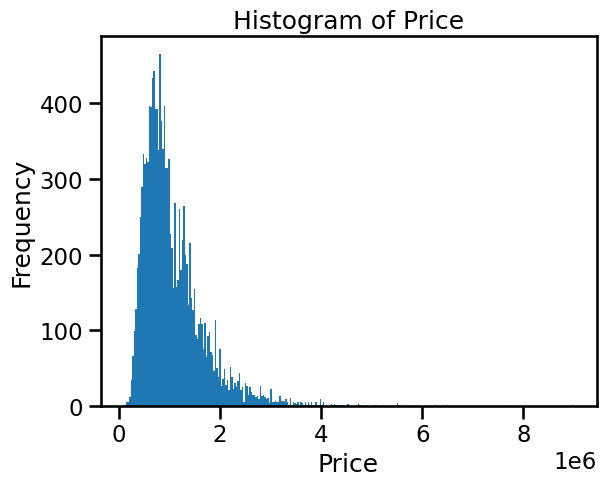

In [ ]:
plt.hist(melb_int_col['Price'], bins=300)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Price')

plt.show()

In [ ]:
#Calculamos los cuartiles para luego establecer el umbral superior y eliminar los valores que se encuentren por encima de éste.
Q1 = melb_int_col['Price'].quantile(0.25)
Q2 = melb_int_col['Price'].quantile(0.5)
Q3 = melb_int_col['Price'].quantile(0.75)

Q = [Q1,Q2,Q3]
Q

[650000.0, 903000.0, 1330000.0]

In [ ]:
Umbral_Sup = Q3 + 1.5 * (Q3-Q1)
Umbral_Sup

2350000.0

In [ ]:
ms_df_int_col_filt = melb_int_col[melb_int_col['Price']  < Umbral_Sup]
ms_df_int_col_filt

,Suburb,Rooms,Type,Price,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude
0,Abbotsford,2,h,1480000.0,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840
1,Abbotsford,2,h,1035000.0,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340
2,Abbotsford,3,h,1465000.0,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440
3,Abbotsford,3,h,850000.0,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690
4,Abbotsford,4,h,1600000.0,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13574,Westmeadows,3,h,582000.0,3049.0,3.0,2.0,2.0,256.0,NaN,NaN,NaN,-37.67917,144.89390
13575,Wheelers Hill,4,h,1245000.0,3150.0,4.0,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761
13576,Williamstown,3,h,1031000.0,3016.0,3.0,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904
13577,Williamstown,3,h,1170000.0,3016.0,3.0,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738


In [ ]:
ms_df_int_col_filt.describe()

,Rooms,Price,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude
count,12956.000000,1.295600e+04,12956.000000,12956.000000,12956.000000,12897.00000,12956.000000,6766.000000,7798.000000,12956.000000,12956.000000
mean,2.884455,9.813593e+05,3103.913168,2.862998,1.486338,1.58091,517.115313,144.997402,1965.767120,-37.807526,144.993567
std,0.927808,4.529251e+05,92.079365,0.939786,0.639047,0.94522,1498.205505,552.864779,36.555041,0.080122,0.105535
min,1.000000,8.500000e+04,3000.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1196.000000,-38.182550,144.431810
25%,2.000000,6.370000e+05,3044.000000,2.000000,1.000000,1.00000,168.000000,91.000000,1950.000000,-37.856113,144.926045
50%,3.000000,8.800000e+05,3081.000000,3.000000,1.000000,2.00000,416.000000,122.000000,1970.000000,-37.798740,144.998225
75%,3.000000,1.270000e+06,3147.000000,3.000000,2.000000,2.00000,645.000000,165.000000,2000.000000,-37.753700,145.057285
max,10.000000,2.345000e+06,3977.000000,20.000000,8.000000,10.00000,76000.000000,44515.000000,2018.000000,-37.408530,145.526350


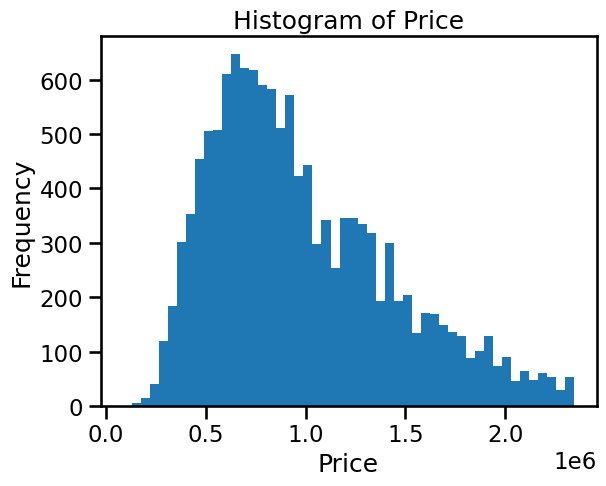

In [ ]:
plt.hist(ms_df_int_col_filt['Price'], bins=50)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Price')

plt.show()

## **Ejercicio 2.2.1**

Seleccionar qué variables agregar y qué combinaciones aplicar a cada una. Por ejemplo, pueden utilizar solo la columna price, o aplicar múltiples transformaciones como la mediana o el mínimo.


In [ ]:
# Cargar el conjunto de datos de Airbnb inicial para obtener datos de enotrno
airbnb_df_original = pd.read_csv(
    'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/cleansed_listings_dec18.csv')

airbnb_df_original.columns

<ipython-input-33-42a950245152>:2: DtypeWarning: Columns (35,77) have mixed types. Specify dtype option on import or set low_memory=False.
  airbnb_df_original = pd.read_csv(


Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'neighborhood_overview', 'notes', 'transit',
       'access', 'interaction', 'house_rules', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighborhood',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighborhood', 'city', 'suburb', 'state', 'zipcode',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'price',
       'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee',
       'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights',
       'calendar_updated', 

In [ ]:
airbnb_df.columns

Index(['description', 'neighborhood_overview', 'street', 'neighborhood',
       'city', 'suburb', 'state', 'zipcode', 'latitude', 'longitude', 'price',
       'weekly_price', 'monthly_price'],
      dtype='object')

In [ ]:
# Seleccionar las columnas especificadas en interesting_cols retomamos el del ejercicio SQL

# Seleccionar las columnas relacionadas al entorno
#neighborhood_overview: Descripción general del vecindario.
#transit: Información sobre opciones de transporte público cercanas.
#street: Nombre de la calle donde se encuentra la propiedad.
#neighborhood: Nombre del vecindario donde se encuentra la propiedad.
#city: Nombre de la ciudad donde se encuentra la propiedad.
#suburb: Nombre del suburbio donde se encuentra la propiedad.
#state: Estado o provincia donde se encuentra la propiedad.
#latitude: Latitud de la ubicación de la propiedad. - para realizar marged
#longitude: Longitud de la ubicación de la propiedad - - para realizar marged

entorno_columns = ['transit','latitude', 'longitude']

df_entorno = airbnb_df_original[entorno_columns]

# Unir los dos DataFrames en base a las columnas de latitud y longitud
df_merged_airbnb = pd.merge(df_entorno, airbnb_df, on=['latitude', 'longitude'])


In [ ]:
df_merged_airbnb

,transit,latitude,longitude,description,neighborhood_overview,street,neighborhood,city,suburb,state,zipcode,price,weekly_price,monthly_price
0,"YES ! The bus (305,309) is exactly two blocks ...",-37.772684,145.092133,"House: Clean, New, Modern, Quite, Safe. 10Km f...",Very safe! Family oriented. Older age group.,"Bulleen, VIC, Australia",Balwyn North,Manningham,Bulleen,VIC,3105,60,NaN,NaN
1,Easy transport options - the tram is right out...,-37.766505,144.980736,A large air conditioned room with queen spring...,This hip area is a crossroads between two grea...,"Brunswick East, VIC, Australia",Brunswick,Moreland,Brunswick East,VIC,3057,35,200.0,803.0
2,Our apartment is located within walking distan...,-37.859755,144.977369,RIGHT IN THE HEART OF ST KILDA! It doesn't get...,A stay at our apartment means you can enjoy so...,"St Kilda, VIC, Australia",St Kilda,Port Phillip,St Kilda,VIC,3182,159,1253.0,4452.0
3,Public transport is super convenient with a ch...,-37.758971,144.989228,"Comfortable, relaxed house, a home away from ...","This is a great neighbourhood – it is quiet, y...","Thornbury, VIC, Australia",Thornbury,Darebin,Thornbury,VIC,3071,50,250.0,920.0
4,NaN,-37.864530,144.992238,We offer comfortable accommodation in Inner Me...,NaN,"St Kilda East, VIC, Australia",St Kilda East,Port Phillip,St Kilda East,VIC,3183,69,400.0,1900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22890,NaN,-37.802415,144.962967,"near city, near tram station",NaN,"Carlton, VIC, Australia",Carlton,Melbourne,Carlton,VIC,3053.0,55,NaN,NaN
22891,NaN,-37.705095,144.574474,"Close to: Melton Rail, Coles, Coffee Lounge an...",NaN,"Melton South, VIC, Australia",NaN,Melton,Melton South,VIC,3338.0,129,NaN,NaN
22892,NaN,-37.875252,145.162757,"Hi, 我是一名中国留学生. 由于暑假原因决定出租我的房间. 我会留下我所使用的物品给我的租...",NaN,"Glen Waverley, VIC, Australia",NaN,Monash,Glen Waverley,VIC,3150.0,53,NaN,NaN
22893,"There is a tram stop within 300m walk, trams s...",-37.827795,144.954987,Immaculately presented and carefully maintaine...,A plethora of Melbourne highlights are just a ...,"Southbank, VIC, Australia",Southbank,Melbourne,Southbank,VIC,3006.0,130,NaN,NaN


In [ ]:
melb_df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0


## **Ejercicio 2.2.2**

In [ ]:
df_merged_airbnb.zipcode.value_counts()[:5] # se observa este zipcode tiene tipos diferentes, que tendremos que estandarizar antes de continuar con la combinación de los datos.

3000.0    2491
3000       876
3006.0     860
3182.0     579
3182       556
Name: zipcode, dtype: int64

In [ ]:
df_merged_airbnb['zipcode'] = pd.to_numeric(df_merged_airbnb.zipcode, errors='coerce')## estandarizamos los zipcode

In [ ]:
df_merged_airbnb.zipcode.value_counts().head(5) #se controla la estandarización


3000.0    3367
3006.0    1268
3182.0    1135
3141.0     881
3004.0     728
Name: zipcode, dtype: int64

In [ ]:
df_merged_airbnb['zipcode_int'] = df_merged_airbnb.zipcode.fillna(0).astype('int') #convertimos los valores a enteros y rellenamos faltantes

In [ ]:
df_merged_airbnb['zipcode_int']==0 ##imputamos 0 a los que tenian nulo

0        False
1        False
2        False
3        False
4        False
         ...  
22890    False
22891    False
22892    False
22893    False
22894    False
Name: zipcode_int, Length: 22895, dtype: bool

In [ ]:
zipcodes_count=df_merged_airbnb.zipcode_int.value_counts()
zipcodes_count

3000     3367
3006     1268
3182     1135
3141      881
3004      728
         ... 
3785        1
3096        1
30122       1
3912        1
4068        1
Name: zipcode_int, Length: 248, dtype: int64

In [ ]:
#Filtramos solo aquellos que tienen más de 5 registros
filtered_zipcodes = zipcodes_count[zipcodes_count > 5].index
filtered_zipcodes

Int64Index([3000, 3006, 3182, 3141, 3004, 3121, 3008, 3053, 3181, 3056,
            ...
            3978, 3815, 3335, 3093, 3750, 3803, 3085, 3089, 3804, 3975],
           dtype='int64', length=208)

In [ ]:
#Generamos el nuevo DataFrame de Airbnb solo con los datos de los zipcode filtrados
filtered_df_zc = df_merged_airbnb[df_merged_airbnb.zipcode_int.isin(filtered_zipcodes)]
filtered_df_zc

,transit,latitude,longitude,description,neighborhood_overview,street,neighborhood,city,suburb,state,zipcode,price,weekly_price,monthly_price,zipcode_int
0,"YES ! The bus (305,309) is exactly two blocks ...",-37.772684,145.092133,"House: Clean, New, Modern, Quite, Safe. 10Km f...",Very safe! Family oriented. Older age group.,"Bulleen, VIC, Australia",Balwyn North,Manningham,Bulleen,VIC,3105.0,60,NaN,NaN,3105
1,Easy transport options - the tram is right out...,-37.766505,144.980736,A large air conditioned room with queen spring...,This hip area is a crossroads between two grea...,"Brunswick East, VIC, Australia",Brunswick,Moreland,Brunswick East,VIC,3057.0,35,200.0,803.0,3057
2,Our apartment is located within walking distan...,-37.859755,144.977369,RIGHT IN THE HEART OF ST KILDA! It doesn't get...,A stay at our apartment means you can enjoy so...,"St Kilda, VIC, Australia",St Kilda,Port Phillip,St Kilda,VIC,3182.0,159,1253.0,4452.0,3182
3,Public transport is super convenient with a ch...,-37.758971,144.989228,"Comfortable, relaxed house, a home away from ...","This is a great neighbourhood – it is quiet, y...","Thornbury, VIC, Australia",Thornbury,Darebin,Thornbury,VIC,3071.0,50,250.0,920.0,3071
4,NaN,-37.864530,144.992238,We offer comfortable accommodation in Inner Me...,NaN,"St Kilda East, VIC, Australia",St Kilda East,Port Phillip,St Kilda East,VIC,3183.0,69,400.0,1900.0,3183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22890,NaN,-37.802415,144.962967,"near city, near tram station",NaN,"Carlton, VIC, Australia",Carlton,Melbourne,Carlton,VIC,3053.0,55,NaN,NaN,3053
22891,NaN,-37.705095,144.574474,"Close to: Melton Rail, Coles, Coffee Lounge an...",NaN,"Melton South, VIC, Australia",NaN,Melton,Melton South,VIC,3338.0,129,NaN,NaN,3338
22892,NaN,-37.875252,145.162757,"Hi, 我是一名中国留学生. 由于暑假原因决定出租我的房间. 我会留下我所使用的物品给我的租...",NaN,"Glen Waverley, VIC, Australia",NaN,Monash,Glen Waverley,VIC,3150.0,53,NaN,NaN,3150
22893,"There is a tram stop within 300m walk, trams s...",-37.827795,144.954987,Immaculately presented and carefully maintaine...,A plethora of Melbourne highlights are just a ...,"Southbank, VIC, Australia",Southbank,Melbourne,Southbank,VIC,3006.0,130,NaN,NaN,3006


In [ ]:
relevant_cols = ['price', 'weekly_price', 'monthly_price']

In [ ]:
filtered_df_zc= filtered_df_zc[relevant_cols + ['zipcode_int']]\
  .groupby('zipcode_int').mean().reset_index()


In [ ]:
filtered_df_zc

,zipcode_int,price,weekly_price,monthly_price
0,0,159.630137,906.083333,3179.666667
1,3000,150.504307,918.738956,3407.204651
2,3002,200.979695,956.379310,3712.714286
3,3003,130.205993,760.200000,2629.500000
4,3004,158.271978,1061.171429,3759.925926
...,...,...,...,...
203,3910,118.000000,250.000000,NaN
204,3911,334.600000,1340.000000,6350.000000
205,3975,99.500000,850.000000,3000.000000
206,3977,92.955556,422.000000,1025.000000


In [ ]:
#Realizamos el mismo analisis para  melb_df
melb_df['postcode_int'] = melb_df.Postcode.fillna(0).astype('int')
postcodes_count=melb_df.postcode_int.value_counts()

#Filtramos solo aquellos que tienen más de 5 registros
filtered_postcodes = postcodes_count[postcodes_count > 5].index

filtered_df_pc = melb_df[melb_df['postcode_int'].isin(filtered_postcodes)]
filtered_df_pc.drop(columns = ['Postcode'])
filtered_df_pc

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,postcode_int
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0,3067
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0,3067
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0,3067
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0,3067
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0,3067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0,3150
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0,3016
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0,3016
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0,3016


In [ ]:
intersection = np.intersect1d(filtered_df_zc.zipcode_int.values, filtered_df_pc.Postcode.values, assume_unique=False)
print("Airbnb unique zipcodes", len(filtered_df_zc.zipcode_int.unique()))
print("Melb unique postcodes", len(filtered_df_pc.postcode_int.unique()))
print("Common zipcodes", len(intersection))



Airbnb unique zipcodes 208
Melb unique postcodes 163
Common zipcodes 156


In [ ]:
#Unimos los dos DataFrame

merged_sales_df = filtered_df_pc.merge(
    filtered_df_zc, how='left',
    left_on='postcode_int', right_on='zipcode_int'
)
merged_sales_df.sample(5)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,postcode_int,zipcode_int,price,weekly_price,monthly_price
4039,Mont Albert,6/41 Zetland Rd,2,u,540000.0,S,hockingstuart,15/10/2016,11.8,3127.0,...,Whitehorse,-37.81720,145.11140,Eastern Metropolitan,2079.0,3127,3127.0,86.411765,444.500000,1699.000000
3493,Keilor East,83 Milleara Rd,3,h,875000.0,PI,Barry,26/07/2016,12.8,3033.0,...,Moonee Valley,-37.73620,144.86430,Western Metropolitan,5629.0,3033,3033.0,83.642857,306.666667,850.000000
11378,Meadow Heights,11 Hermitage Ct,3,h,520000.0,S,Stockdale,15/07/2017,17.4,3048.0,...,Hume,-37.65384,144.92272,Northern Metropolitan,4704.0,3048,NaN,NaN,NaN,NaN
6787,Brunswick East,6212/172 Edward St,2,u,590000.0,VB,LITTLE,17/09/2016,4.5,3057.0,...,Moreland,-37.77530,144.97250,Northern Metropolitan,5533.0,3057,3057.0,154.432432,595.842105,2789.666667
5895,Strathmore,34 Woodland St,3,h,1194000.0,S,Nelson,11/02/2017,9.7,3041.0,...,Moonee Valley,-37.74360,144.93080,Western Metropolitan,3284.0,3041,3041.0,106.125000,350.000000,1500.000000


In [ ]:
merged_sales_df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,postcode_int,zipcode_int,price,weekly_price,monthly_price
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0,3067,3067.0,130.624031,605.152174,2187.032258
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0,3067,3067.0,130.624031,605.152174,2187.032258
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0,3067,3067.0,130.624031,605.152174,2187.032258
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0,3067,3067.0,130.624031,605.152174,2187.032258
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0,3067,3067.0,130.624031,605.152174,2187.032258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13493,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0,3150,3150.0,124.026455,526.350000,1901.611111
13494,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,NaN,-37.85927,144.87904,Western Metropolitan,6380.0,3016,3016.0,191.094595,612.250000,2119.750000
13495,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,NaN,-37.85274,144.88738,Western Metropolitan,6380.0,3016,3016.0,191.094595,612.250000,2119.750000
13496,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,NaN,-37.85908,144.89299,Western Metropolitan,6380.0,3016,3016.0,191.094595,612.250000,2119.750000


In [ ]:
merged_sales_df.columns


Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount', 'postcode_int',
       'zipcode_int', 'price', 'weekly_price', 'monthly_price'],
      dtype='object')

## **Ejercicio 2.2.3**




Una variable apta para combinar los datos con el fin de predicción del valor de la propiedad segun la zona, puede ser agrupar los valores de **Latitud y longitud**  Con un tratamiento previo de los datos que determinen 4 puntos que formen zonas cuadrilateras para comparar segun el interés del analista.

Otra variable que se puede usar si hablamos de comparar el entorno es **suburbio o barrio**, con el mismo podemos agrupar en base a los barrios en los que estan dispuestos.


## **Ejercicio 3**

Guardamos los archivos filtrados de Zipcode y Postcode + el archivo de interseccion de ambos. Trabajados en el ejercicio 2.2.2

In [ ]:
merged_sales_df.to_csv("melb_data_extended_pd_TP1.csv", index=None)

In [ ]:
from google.colab import files
files.download('melb_data_extended_pd_TP1.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
filtered_df_pc.to_csv("melb_data_filtered_pd_TP1.csv", index=None)

In [ ]:
from google.colab import files
files.download('melb_data_filtered_pd_TP1.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
filtered_df_zc.to_csv("airbnb_data_filtered_pd_TP1.csv", index=None)

In [ ]:
from google.colab import files
files.download('airbnb_data_filtered_pd_TP1.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>